In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import InputLayer,Dense,BatchNormalization
from keras.regularizers import l2
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.callbacks import CSVLogger,EarlyStopping,ModelCheckpoint,LearningRateScheduler,ReduceLROnPlateau
import tensorflow as tf

In [30]:
data = pd.read_csv("/content/sample_data/mnist_train_small.csv")

In [31]:
column_names = ["Pixel "+str(i) for i in range(0,784)]

In [32]:
column_names.insert(0,"label")

In [33]:
data = np.array(data)

In [34]:
data = pd.DataFrame(data,columns=column_names)

In [35]:
data

,label,Pixel 0,Pixel 1,Pixel 2,Pixel 3,Pixel 4,Pixel 5,Pixel 6,Pixel 7,Pixel 8,Pixel 9,Pixel 10,Pixel 11,Pixel 12,Pixel 13,Pixel 14,Pixel 15,Pixel 16,Pixel 17,Pixel 18,Pixel 19,Pixel 20,Pixel 21,Pixel 22,Pixel 23,Pixel 24,Pixel 25,Pixel 26,Pixel 27,Pixel 28,Pixel 29,Pixel 30,Pixel 31,Pixel 32,Pixel 33,Pixel 34,Pixel 35,Pixel 36,Pixel 37,Pixel 38,...,Pixel 744,Pixel 745,Pixel 746,Pixel 747,Pixel 748,Pixel 749,Pixel 750,Pixel 751,Pixel 752,Pixel 753,Pixel 754,Pixel 755,Pixel 756,Pixel 757,Pixel 758,Pixel 759,Pixel 760,Pixel 761,Pixel 762,Pixel 763,Pixel 764,Pixel 765,Pixel 766,Pixel 767,Pixel 768,Pixel 769,Pixel 770,Pixel 771,Pixel 772,Pixel 773,Pixel 774,Pixel 775,Pixel 776,Pixel 777,Pixel 778,Pixel 779,Pixel 780,Pixel 781,Pixel 782,Pixel 783
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


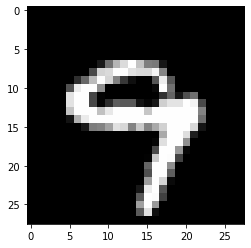

In [36]:
plt.imshow(np.array(data.iloc[2,1:]).reshape(28,28),cmap='gray')

In [37]:
data = np.array(data)

In [38]:
np.random.shuffle(data)

In [39]:
X = data[:,1:]

In [40]:
Y = data[:,0]

In [41]:
X = X[1:,:]

In [42]:
Y = Y[1:]

In [43]:
X.shape

(19998, 784)

In [44]:
Y.shape

(19998,)

In [45]:
X_train,X_cv,Y_train,Y_cv = train_test_split(X,Y,test_size=0.20,random_state=42)

In [46]:
X_train.shape

(15998, 784)

In [47]:
Y_train = np.eye(10,10)[Y_train]

In [48]:
Y_train.shape

(15998, 10)

In [49]:
Y_cv = np.eye(10,10)[Y_cv]

In [50]:
Y_cv.shape

(4000, 10)

In [64]:
def build_network():

  network = Sequential()
  network.add(InputLayer(input_shape=(X_train.shape[1],)))
  network.add(Dense(units=X_train.shape[1],activation="relu",kernel_initializer="glorot_normal"))
  network.add(BatchNormalization())
  network.add(Dense(units=Y_train.shape[1],activation="softmax",kernel_initializer="glorot_normal"))

  return network

In [65]:
network = build_network()

In [66]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 784)               615440    
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_7 (Dense)              (None, 10)                7850      
Total params: 626,426
Trainable params: 624,858
Non-trainable params: 1,568
_________________________________________________________________


In [67]:
network.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [68]:
import os

In [73]:
def scheduler(epoch, lr):
  if epoch % 5 != 0:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [82]:
network_callbacks = [ModelCheckpoint(filepath=os.path.join("/content/sample_data","ckpt"),monitor="val_accuracy",verbose=1),
                     LearningRateScheduler(schedule=scheduler,verbose=1),
                     ReduceLROnPlateau(monitor="val_accuracy",factor=0.5,patience=5,verbose=1,min_delta=0.1)]

In [84]:
import keras
import numpy as np

In [96]:
class ActivationLogger(keras.callbacks.Callback):

  def get_network_details(self,network):
    self.model = network
    layer_outputs = [layer.output for layer in network.layers]
    self.network_activations = keras.models.Model(network.input,layer_outputs)

  def on_epoch_end(self,epoch,logs=None):
    if self.validation_data is None:
      raise RuntimeError("Requires validation_data")

    validation_sample = self.validation_data[0][0:1]
    outputs = self.network_activations.predict(validation_sample)
    f = open("./layer_outputs_at_epoch_"+str(epoch)+".npz","w")
    np.savez(f,outputs)
    f.close()

In [97]:
callback_obj = ActivationLogger()

In [98]:
network.fit(x=X_train,y=Y_train,batch_size=38,epochs=10,validation_data=(X_cv,Y_cv),callbacks=callback_obj.get_network_details(network))

Epoch 1/10
421/421 [==============================] - 4s 9ms/step - loss: 7.2687e-05 - accuracy: 1.0000 - val_loss: 0.1736 - val_accuracy: 0.9718
Epoch 2/10
421/421 [==============================] - 3s 8ms/step - loss: 5.5983e-05 - accuracy: 1.0000 - val_loss: 0.1808 - val_accuracy: 0.9707
Epoch 3/10
421/421 [==============================] - 4s 9ms/step - loss: 4.8425e-05 - accuracy: 1.0000 - val_loss: 0.1700 - val_accuracy: 0.9718
Epoch 4/10
421/421 [==============================] - 3s 8ms/step - loss: 5.3673e-05 - accuracy: 1.0000 - val_loss: 0.1836 - val_accuracy: 0.9710
Epoch 5/10
421/421 [==============================] - 4s 9ms/step - loss: 1.2527e-04 - accuracy: 0.9999 - val_loss: 0.2074 - val_accuracy: 0.9700
Epoch 6/10
421/421 [==============================] - 3s 8ms/step - loss: 3.7002e-05 - accuracy: 1.0000 - val_loss: 0.2107 - val_accuracy: 0.9705
Epoch 7/10
421/421 [==============================] - 4s 9ms/step - loss: 4.2052e-05 - accuracy: 1.0000 - val_loss: 0.1690 -

In [ ]:
test_data = np.array(pd.read_csv("/content/sample_data/mnist_test.csv"))

In [ ]:
X_test = test_data[:,1:]

In [ ]:
X_test.shape

(9999, 784)

In [ ]:
Y_test = test_data[:,0]

In [ ]:
Y_test = np.eye(10,10)[Y_test]

In [ ]:
Y_test.shape

(9999, 10)

In [ ]:
network.evaluate(x=X_test,y=Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2143 - accuracy: 0.9568


[0.21428178250789642, 0.9567956924438477]